This notebook was created in collaboration with **Piotr Wnuk-Lipiński**.

In [8]:
import numpy as np
import pandas as pd

%matplotlib inline

## pandas - a package for data analysis and manipulation

Let's generate a random dataset pretending a dataset used in recommender systems. 

A recommender system is a type of algorithm that suggests items (like movies, products, or songs) to users based on their previous behavior, preferences, or similarities to other users.

### Dataset Description

Each row corresponds to a rating of a product by a user. Successive columns correspond to:
* `time` – timestamp of the interaction
* `uid` – user ID
* `pid` – product (or item) ID
* `rating` – the score or preference given by the user.

### Generating Random Timestamps in Pandas

We replace the `time` column with random integers between `0` and `24*60*60` (the number of seconds in a day).
So each value represents a **random number of seconds** within one day.

Here’s the key part:

* `pd.to_datetime('2025-01-01')` sets a **starting date** (January 1, 2025).
* `pd.to_timedelta(1e9 * df['time'])` converts the number of seconds into a **timedelta object**.
  Multiplying by `1e9` changes seconds into **nanoseconds**, which is the time unit used by Pandas internally.
* Adding these together gives us realistic **timestamp values** for our dataset.

In [ ]:
N = 100000

data_ = np.random.randint(1000, size=(N, 4))

df = pd.DataFrame(data_, columns=['time', 'uid', 'pid', 'rating'])

df['time'] = np.random.randint(0, 24 * 60 * 60, size=(N))
df['time'] = pd.to_datetime('2025-01-01') + pd.to_timedelta(1e9 * df['time'])

df['rating'] = np.random.randint(10, size=(N))

df.head()

,time,uid,pid,rating
0,2025-01-01 08:41:08,676,599,8
1,2025-01-01 04:07:52,601,875,7
2,2025-01-01 21:09:31,579,410,6
3,2025-01-01 15:55:18,877,624,0
4,2025-01-01 01:45:37,143,93,1


### `hist()` Method — Creating a Histogram

The `hist()` method creates a **histogram**, a plot that shows how often certain ranges of values occur in your data. It is one of the most common ways to visualize **distributions**.

What are *bins*?

* A histogram groups continuous (or numeric) data into **intervals** called **bins**.
* Each bin represents a **range of values**, and the **height of the bar** shows how many data points fall within that range.
* The parameter `bins` defines **how many intervals** the data is divided into.

To see other chart visualisation methods, see: [this article](https://pandas.pydata.org/docs/user_guide/visualization.html).

pid
847    137
93     132
37     129
424    128
941    127
546    126
618    125
795    124
840    124
489    124
829    124
19     123
390    122
155    122
416    122
889    121
778    121
799    121
94     121
422    121
858    121
951    121
490    120
961    120
216    120
Name: count, dtype: int64


<Axes: >

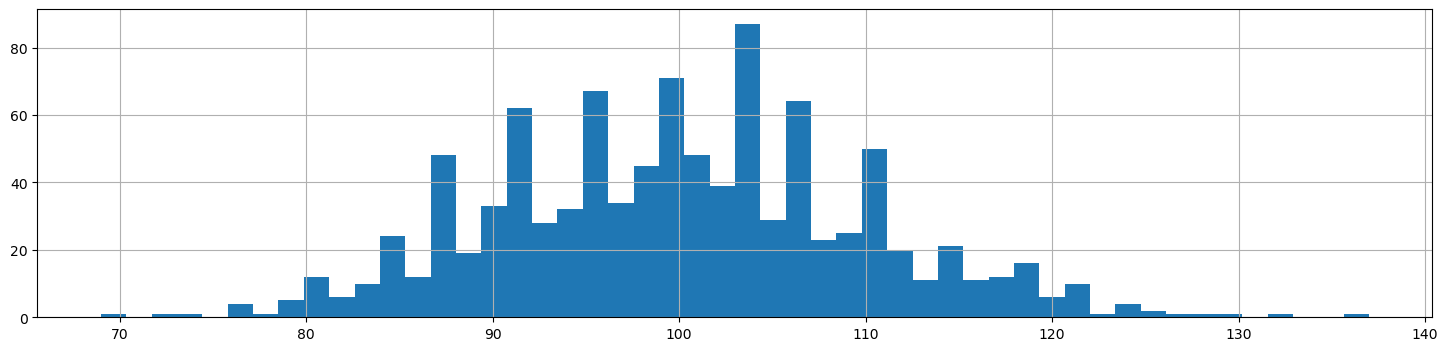

In [10]:
# Let's see the 25 most popular products in the dataset. Let's make a histogram of the product popularity.

df_ = df['pid'].value_counts()

print(df_.head(25))

df_.hist(figsize=(18, 4), bins=50)

### `isin()` Method

The `isin()` method in Pandas is used to filter rows based on whether values appear in a given list or set.
It’s one of the most common tools for selecting a subset of data that meets specific criteria.

`isin()` checks if each element in a column is contained in a list, array, or another column.
It returns a **Boolean Series** — `True` where the value is found, and `False` otherwise.

In [11]:
# Let's prepare a sub-dataset that keeps only the 100 most popular products in the dataset and removes the others.

df_ = df['pid'].value_counts() # Count product popularity

pids = df_.index[:100] # Select the top 100 most popular products

df_preprocessed = df[df['pid'].isin(pids)] # Keep only those products in the dataset
df_preprocessed

,time,uid,pid,rating
4,2025-01-01 01:45:37,143,93,1
6,2025-01-01 07:19:20,98,941,6
22,2025-01-01 15:43:56,933,142,2
30,2025-01-01 23:13:07,875,648,4
38,2025-01-01 00:43:08,576,388,9
...,...,...,...,...
99948,2025-01-01 14:28:51,727,877,9
99956,2025-01-01 18:22:10,452,694,1
99959,2025-01-01 01:25:49,335,779,3
99994,2025-01-01 19:46:24,450,546,2


### `groupby()` - grouping and aggregating data

The `groupby()` method is used to split a dataset into groups, apply a function to each group, and then combine the results.
It’s a core operation in data analysis for summarizing, aggregating, and exploring patterns.

How `groupby()` works? Conceptually, it follows the pattern:
> Split → Apply → Combine

1. **Split** – Divide the data into groups based on the values in one or more columns.
2. **Apply** – Run an aggregation function (like mean(), sum(), count(), etc.) on each group separately.
3. **Combine** – Merge the results into a single output object.

In [12]:
# Let's see what is the mean of ratings given by each user (which may be interpreted as the user baseline rating or a type of
# the user optimism level).

df.groupby('uid')['rating'].mean().to_frame()

# Try to run the command below. What type of object does it return?
# df.groupby('uid')['rating'].mean() # use type() function on both examples

,rating
uid,
0,4.626506
1,4.676471
2,4.389831
3,4.882979
4,4.285714
...,...
995,4.659794
996,4.416667
997,4.197802


Let’s unpack it step by step:

1. `df.groupby('uid')`
   Groups the dataset by **user ID (`uid`)** — each group contains all the ratings from one user.

2. `['rating'].mean()`
   Selects the `rating` column within each group and computes the **average rating per user**.
   This returns a **Pandas Series**:

   * index → user IDs (`uid`)
   * values → average ratings

3. `.to_frame()`
   Converts the Series into a **DataFrame**.
   This is purely for **formatting and convenience** — it makes the result easier to view, manipulate, or join with other DataFrames later.

### `stack()` and `unstack()`

These methods are used to **reshape DataFrames**, especially when working with MultiIndex (hierarchical) data.

#### `unstack()`

* Moves **one level of the row index** (MultiIndex) to the columns.
* Often used to create a **“wide” format** for visualization or analysis.
* Returns a DataFrame with **columns representing the selected index level**.

#### `stack()`

* The opposite of `unstack()`.
* Moves **columns back to the row index**.

![stack_unstack](./Images/stack_unstack.webp)

#### Creating a User–Item Matrix

The following command builds a matrix of ratings, where:
* each row represents a user (uid),
* each column represents a product (pid),
* and each cell contains the mean rating that a user gave to a product.

In [13]:
# Let's make the matrix of ratings, where columns correspond to products, rows correspond to users, and the values are the
# ratings (in fact, means of ratings, if an user rated a product multiple times).
# REMARK: Such a dataframe may require a large amount of memory. In practice, try to avoid it.

df.groupby(['uid', 'pid'])['rating'].mean().unstack().fillna(0.0)

# # Try to run command below and see what it returns.
# df.groupby(['uid', 'pid'])['rating'].mean()

pid,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
uid,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,7.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's Unpack It Step by Step:

We want a **matrix of ratings**, where rows = users, columns = products, and values = mean ratings.

1. `groupby(['uid', 'pid'])`

When you pass **multiple column names** to `groupby()`, Pandas groups data by **unique combinations** of those columns.

Here:
* Groups the dataset first by **user ID (`uid`)**
* Then by **product ID (`pid`)**

Each group now contains **all ratings that a specific user gave to a specific product**.
If a user rated the same product multiple times, all those entries are grouped together.

2. `['rating'].mean()`

For each `(user, product)` pair, we compute the **average rating**:

* The result is a **Series with a MultiIndex**:

  * **first level** → `uid`
  * **second level** → `pid`
  * **value** → mean rating

At this stage, data looks like:

| uid | pid | rating |
| --- | --- | ------ |
| 1   | 10  | 7.5    |
| 1   | 25  | 6.0    |
| 2   | 10  | 8.0    |
| 3   | 42  | 9.0    |
| …   | …   | …      |

3. `.unstack()`

`unstack()` **pivots one level of the index into columns**, turning the data from **long** to **wide** format.

* Moves the second index level (`pid`) from rows to columns
* Each product (`pid`) becomes a **separate column**
* Each user (`uid`) remains a **row index**

Now the table looks like:

| uid | pid_10 | pid_25 | pid_42 | … |
| --- | ------ | ------ | ------ | - |
| 1   | 7.5    | 6.0    | NaN    | … |
| 2   | 8.0    | NaN    | NaN    | … |
| 3   | NaN    | NaN    | 9.0    | … |

This is a **user–product rating matrix**, ready for recommender system algorithms.

4. `.fillna(0.0)`

After unstacking, many cells are **NaN** — meaning the user **never rated that product**. `.fillna(0.0)` replaces all `NaN` values with `0.0` → indicates **no rating / no interaction**

Tak, jeśli miałbym przygotować notatkę dla studentów, dodałbym kilka istotnych uzupełnień, które często pomagają zrozumieć praktyczne konsekwencje użycia tych metod. Oto, jak mogłaby wyglądać poprawiona i lekko rozbudowana wersja Twojej notatki:

---

### Working with time-based data — `set_index()`, `between_time()`, `resample()`

These methods are essential for analyzing and summarizing time series data in pandas. They allow you to structure your dataset around time, focus on specific time windows, and aggregate information over regular intervals.

#### `set_index()` Method

`set_index()` converts one or more columns into the DataFrame’s index. This is not just cosmetic — it fundamentally changes how pandas organizes, accesses, and aligns data.

**Why we do it**

* Identify rows by meaningful labels instead of integers.
* Enable time-based operations like `resample()`, `shift()`, or `rolling()`.
* Improve alignment and merging with other DataFrames.
* Simplify selection, slicing, and grouping.

**Consequences**

* The chosen column(s) move from “data” to “structure” (row labels). If you need the column later, you may need to `reset_index()`.
* Operations like `.loc[]`, `.reindex()`, `.join()` rely on the index.
* The type of index affects method behavior: a `DatetimeIndex` allows time operations; a `MultiIndex` enables hierarchical organization.
* **Important:** Many time series methods only work if the index is sorted by time. Use `sort_index()` after `set_index()` if needed.
Absolutely! Here's the same **student-friendly note in English** about Single Index vs MultiIndex in pandas:

##### **Single (Regular) Index**

* Standard DataFrame index — either one column or default integers (0, 1, 2…).
* Each row is uniquely identified by **a single label**.

##### **MultiIndex (Hierarchical Index)**

* An index with **more than one level**.
* Organizes data hierarchically, e.g., `user` → `time`.
* Useful for grouping and aggregating data.


#### `between_time()` Method

Selects rows where the **time component** of the index is within a specific interval. Only works with a `DatetimeIndex`.
It only filters **by time**, ignoring the date. You can set parameters like `include_start` and `include_end` to control boundary behavior.

#### `resample()` - Aggregating over time intervals

`resample()` groups time-indexed data into fixed intervals and applies an aggregation function (like `mean()`, `sum()`, or `count()`). Conceptually, it’s like `groupby()` but for **time bins**.

In simple terms: It’s used to group time-series data based on a specific time frequency and then perform operations like `sum()`, `mean()`, etc.

**Basic Syntax**

```python
df.resample(rule, on='column_name').operation()
```

Here’s a quick breakdown:
* rule: This defines the frequency you want.
  * Example: 'M' for monthly, 'W' for weekly, 'D' for daily.
* on: (Optional) The datetime column you want to apply resampling on.
* Common operations: mean(), sum(), count(), max(), and more.

In [14]:
# Let's see what is the mean of ratings in the entire system in successive hours during the day, from 8 a.m to 4 p.m.

df.set_index('time').between_time('8:00', '16:00').resample('1h')['rating'].mean().to_frame()

,rating
time,
2025-01-01 08:00:00,4.447016
2025-01-01 09:00:00,4.573034
2025-01-01 10:00:00,4.492203
2025-01-01 11:00:00,4.518203
2025-01-01 12:00:00,4.566011
2025-01-01 13:00:00,4.554061
2025-01-01 14:00:00,4.463300
2025-01-01 15:00:00,4.434618
2025-01-01 16:00:00,5.000000


time,2025-01-01 00:00:00,2025-01-01 01:00:00,2025-01-01 02:00:00,2025-01-01 03:00:00,2025-01-01 04:00:00,2025-01-01 05:00:00,2025-01-01 06:00:00,2025-01-01 07:00:00,2025-01-01 08:00:00,2025-01-01 09:00:00,...,2025-01-01 14:00:00,2025-01-01 15:00:00,2025-01-01 16:00:00,2025-01-01 17:00:00,2025-01-01 18:00:00,2025-01-01 19:00:00,2025-01-01 20:00:00,2025-01-01 21:00:00,2025-01-01 22:00:00,2025-01-01 23:00:00
uid,,,,,,,,,,,,,,,,,,,,,
0,2.666667,6.000000,4.333333,5.500000,5.666667,2.333333,5.142857,6.600000,5.333333,8.000000,...,6.600000,7.000000,2.500000,5.750000,3.000000,8.500000,1.333333,5.500000,3.500000,6.500000
1,4.166667,5.000000,6.750000,1.000000,4.750000,3.333333,5.000000,5.500000,2.333333,3.250000,...,4.600000,5.571429,4.571429,5.666667,6.000000,4.000000,6.666667,5.333333,4.500000,5.000000
2,4.166667,3.500000,5.428571,3.750000,4.333333,4.250000,4.000000,5.000000,3.444444,7.000000,...,7.000000,4.250000,4.250000,4.000000,5.000000,2.571429,7.000000,6.000000,5.142857,3.142857
3,3.000000,4.000000,7.000000,4.714286,0.666667,8.500000,1.500000,5.500000,6.500000,6.000000,...,6.000000,2.500000,4.666667,4.250000,9.000000,4.000000,6.166667,4.000000,5.285714,6.000000
4,5.400000,4.000000,4.000000,4.500000,1.666667,4.777778,6.000000,3.000000,5.000000,3.666667,...,3.000000,2.500000,5.000000,3.666667,6.000000,4.800000,4.000000,6.000000,4.400000,3.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.000000,6.222222,6.000000,4.000000,5.000000,3.000000,4.500000,8.000000,6.000000,4.750000,...,4.750000,3.636364,1.750000,2.500000,6.500000,6.333333,4.500000,1.500000,5.285714,4.600000
996,4.666667,3.000000,2.750000,5.833333,5.500000,4.000000,4.666667,4.200000,6.333333,3.400000,...,5.666667,2.000000,5.333333,4.625000,7.250000,2.666667,0.000000,3.400000,4.222222,5.000000
997,5.500000,2.500000,3.000000,3.000000,1.333333,1.000000,8.000000,5.000000,5.500000,4.333333,...,4.666667,5.857143,1.333333,3.000000,3.000000,3.800000,5.333333,4.500000,4.000000,4.166667


<Axes: xlabel='time'>

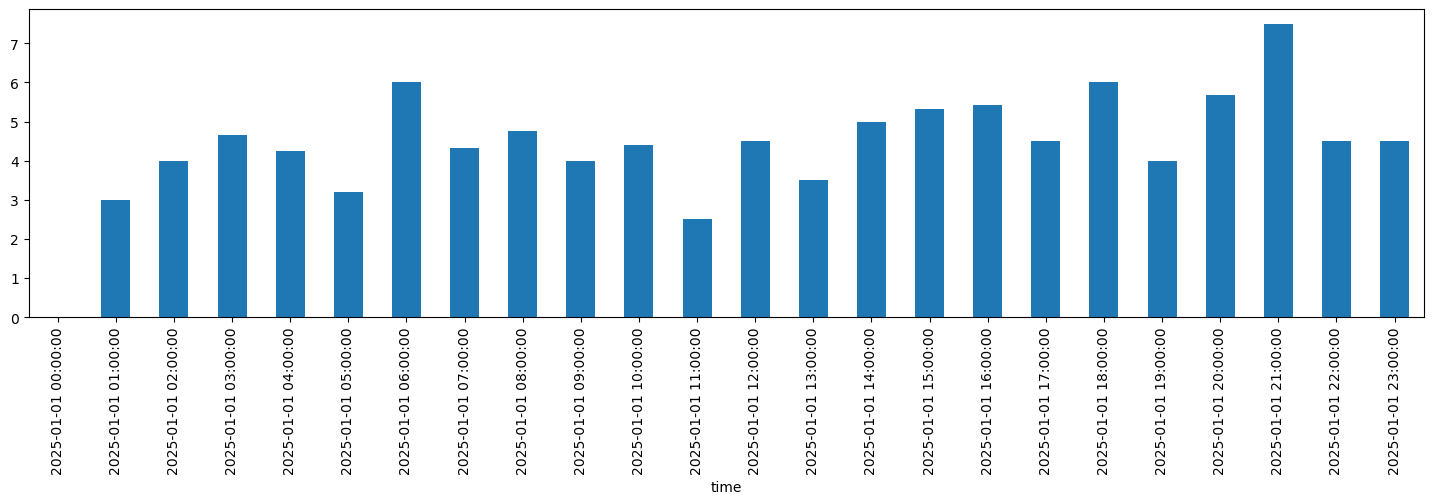

In [15]:
# Let's see what is the mean of ratings given by each user in successive hours during the day (which may be interpreted as the
# change of mood of each user during the day). Let's plot this a random user.

df_ = df.set_index('time').groupby('uid').resample('1h')['rating'].mean().unstack().fillna(0.0)

display(df_)

df_.loc[25].plot(figsize=(18, 4), kind='bar')

### `agg()` — Aggregation Method

`agg()` is a method to apply one or more functions to a DataFrame or Series. It's often used after groupby(), but it works on any Series or DataFrame. These function can apply built-in functions (like sum, mean, max, min) or custom functions (lambda or defined functions).

In [16]:
# Let's make a sequence of products rated by each user. This pretends a dataset used in sequential or session-based recommender
# systems.

df.set_index('time').sort_index().groupby('uid')['pid'].agg(list)

uid
0      [612, 632, 573, 354, 97, 452, 865, 997, 393, 4...
1      [976, 868, 358, 791, 670, 859, 58, 715, 674, 2...
2      [289, 50, 993, 869, 994, 280, 186, 935, 271, 7...
3      [554, 152, 5, 66, 815, 638, 725, 337, 195, 385...
4      [769, 522, 221, 847, 990, 963, 709, 76, 320, 1...
                             ...                        
995    [421, 393, 942, 411, 49, 372, 931, 665, 424, 9...
996    [432, 418, 180, 690, 583, 378, 10, 950, 521, 9...
997    [484, 984, 640, 578, 21, 131, 891, 623, 492, 2...
998    [280, 736, 846, 390, 207, 354, 806, 945, 23, 3...
999    [785, 361, 263, 57, 312, 390, 944, 504, 510, 7...
Name: pid, Length: 1000, dtype: object

In [17]:
# Let's create product names and add them to the dataset.
# REMARK: Yes. This is very inefficient - the data are redundant. It would be better to store the product names in a separate
# dataframe indexed by the product id (a type of a dictionary). But I would like to demonstrate here the map() method and the
# lambda expression.

df['product_name'] = df['pid'].map(lambda x: 'Product No. %04d' % x) #.rename('Product Name')
df

,time,uid,pid,rating,product_name
0,2025-01-01 08:41:08,676,599,8,Product No. 0599
1,2025-01-01 04:07:52,601,875,7,Product No. 0875
2,2025-01-01 21:09:31,579,410,6,Product No. 0410
3,2025-01-01 15:55:18,877,624,0,Product No. 0624
4,2025-01-01 01:45:37,143,93,1,Product No. 0093
...,...,...,...,...,...
99995,2025-01-01 02:41:21,286,674,7,Product No. 0674
99996,2025-01-01 00:53:01,150,968,4,Product No. 0968
99997,2025-01-01 14:47:46,422,778,2,Product No. 0778
99998,2025-01-01 20:40:08,867,380,4,Product No. 0380


### `rename()`

When we compute an aggregation like:

```python
df.groupby('uid')['rating'].mean()
```

we get a **Series** with the same name as the original column (`'rating'`). 
If we join this back to the original DataFrame, the column names would **collide**, causing confusion.
Using `rename()`:

```python
df1 = df.groupby('uid')['rating'].mean().rename('user_mean_rating').to_frame()
```

Gives the new column a clear name (`user_mean_rating`)
Makes it obvious that this column contains **aggregated values**, not individual ratings
Prevents column name conflicts when joining or merging

### **Joins in pandas**

A **join** combines two DataFrames based on **common columns or indices**. It allows you to **enrich one dataset with information from another**.

Pandas provides the `how` parameter to specify the type of join:

| Join type | Description                                                                                 | Example outcome                   |
| --------- | ------------------------------------------------------------------------------------------- | --------------------------------- |
| **inner** | Keep only rows **with keys present in both DataFrames**                                     | Intersection of keys              |
| **left**  | Keep **all rows from the left DataFrame**; add values from right where keys match, else NaN | Left table + matched right values |
| **right** | Keep **all rows from the right DataFrame**; add values from left where keys match, else NaN | Right table + matched left values |
| **outer** | Keep **all rows from both DataFrames**; fill missing values with NaN                        | Union of keys                     |

![](./Images/join.webp)

In [18]:
# Let's evaluate the mean of ratings given by each user and subtract it from each rating of the user (which makes the rating
# more fair, independent of the user baseline rating)

df1 = df.groupby('uid')['rating'].mean().rename('user_mean_rating').to_frame()

df_u = df.join(df1['user_mean_rating'], how='left', on='uid')
df_u['rating'] = df_u['rating'] - df_u['user_mean_rating']
df_u

,time,uid,pid,rating,product_name,user_mean_rating
0,2025-01-01 08:41:08,676,599,3.484536,Product No. 0599,4.515464
1,2025-01-01 04:07:52,601,875,2.800000,Product No. 0875,4.200000
2,2025-01-01 21:09:31,579,410,1.252747,Product No. 0410,4.747253
3,2025-01-01 15:55:18,877,624,-4.300885,Product No. 0624,4.300885
4,2025-01-01 01:45:37,143,93,-3.259542,Product No. 0093,4.259542
...,...,...,...,...,...,...
99995,2025-01-01 02:41:21,286,674,2.084906,Product No. 0674,4.915094
99996,2025-01-01 00:53:01,150,968,-0.120000,Product No. 0968,4.120000
99997,2025-01-01 14:47:46,422,778,-1.964602,Product No. 0778,3.964602
99998,2025-01-01 20:40:08,867,380,-0.666667,Product No. 0380,4.666667


In [19]:
# Let's evaluate the mean of ratings given to each product and subtract it from each rating of the product (which makes the
# rating more fair, independent of the product baseline rating)

df2 = df.groupby('pid')['rating'].mean().rename('product_mean_rating').to_frame()

df_p = df.join(df2['product_mean_rating'], how='left', on='pid')
df_p['rating'] = df_p['rating'] - df_p['product_mean_rating']
df_p

,time,uid,pid,rating,product_name,product_mean_rating
0,2025-01-01 08:41:08,676,599,3.647619,Product No. 0599,4.352381
1,2025-01-01 04:07:52,601,875,2.515152,Product No. 0875,4.484848
2,2025-01-01 21:09:31,579,410,1.333333,Product No. 0410,4.666667
3,2025-01-01 15:55:18,877,624,-3.954023,Product No. 0624,3.954023
4,2025-01-01 01:45:37,143,93,-3.765152,Product No. 0093,4.765152
...,...,...,...,...,...,...
99995,2025-01-01 02:41:21,286,674,2.282609,Product No. 0674,4.717391
99996,2025-01-01 00:53:01,150,968,-0.169811,Product No. 0968,4.169811
99997,2025-01-01 14:47:46,422,778,-2.487603,Product No. 0778,4.487603
99998,2025-01-01 20:40:08,867,380,-0.517647,Product No. 0380,4.517647


<Axes: >

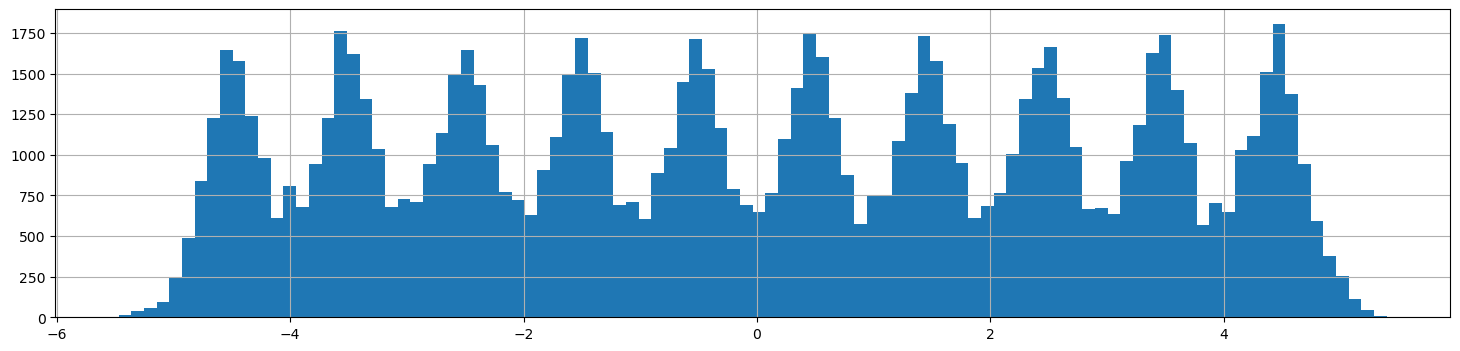

In [20]:
# Let's make a histogram of such relative ratings in the dataset.

df_p['rating'].hist(figsize=(18, 4), bins=100)

### `reset_index()`

`reset_index()` moves the index of a DataFrame back into columns and replaces it with a default integer index (0, 1, 2…).

,product_rating_std
pid,
0,2.968190
1,2.814864
2,2.620073
3,2.624233
4,2.846697
...,...
995,2.894891
996,2.860301
997,3.033086


<Axes: >

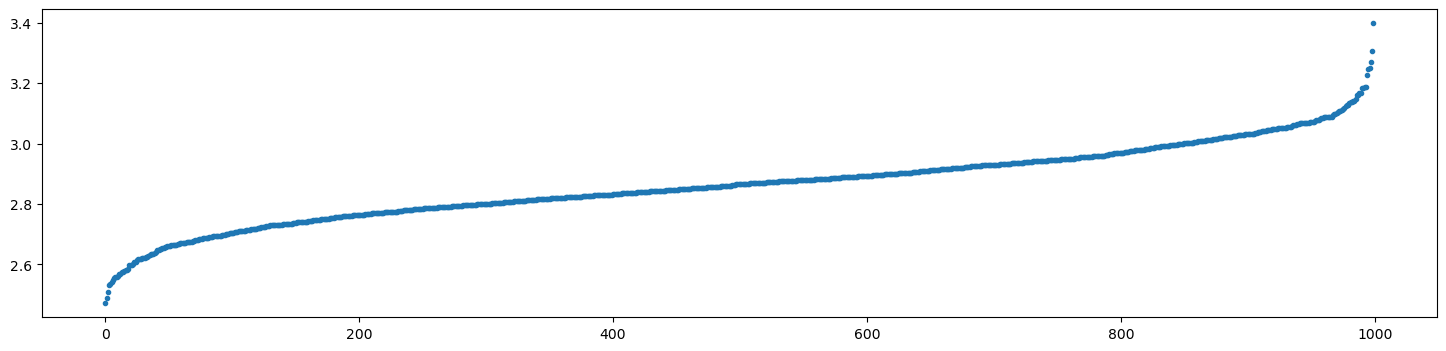

In [21]:
# Let's look at how stable the product ratings are.

df_ = df.groupby('pid')['rating'].std().rename('product_rating_std').to_frame()
display(df_)

df_['product_rating_std'].sort_values().reset_index(drop=True).plot(figsize=(18, 4), linestyle='', marker='.')

### `cut()`

`cut()` is a powerful function in pandas designed to **convert continuous numerical data into discrete bins**, also known as intervals. This is extremely useful when you want to **categorize or group continuous variables** for analysis, visualization, or feature engineering. Essentially, it “bins” a range of numbers into labeled categories.

The core idea is that you take a column of numbers, like user ratings or age, and define **boundaries (bins)**. Each number then belongs to one of these bins, producing a new categorical variable that represents a range rather than a single numeric value. The result is a **Categorical object**, which behaves like a column of categories and can be used for grouping or plotting.

In [22]:
# Let's divide the products into 10 groups in terms of the stability of product ratings.

pd.cut(df_['product_rating_std'], bins=10, labels=False).to_frame()

,product_rating_std
pid,
0,5
1,3
2,1
3,1
4,4
...,...
995,4
996,4
997,6


## dask - a package for remote and/or distributed data analysis and manipulation

### Overview

Dask extends **pandas** and **NumPy** for **parallel and distributed computation**.
It lets you work with large datasets that don’t fit in memory by **dividing data into partitions** and **executing tasks lazily**.

In [23]:
from dask.distributed import Client
client = Client()  # start distributed scheduler locally.
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 11
Total threads: 11,Total memory: 36.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:49610,Workers: 11
Dashboard: http://127.0.0.1:8787/status,Total threads: 11
Started: Just now,Total memory: 36.00 GiB
Comm: tcp://127.0.0.1:49641,Total threads: 1
Dashboard: http://127.0.0.1:49643/status,Memory: 3.27 GiB
Nanny: tcp://127.0.0.1:49613,


### Creating a Dask DataFrame

You can create a Dask DataFrame from an existing pandas DataFrame:

In [24]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

# Create a pandas DataFrame
index = pd.date_range("2021-09-01", periods=2400, freq="1h")
df = pd.DataFrame({
    "a": np.arange(2400),
    "b": list("abcaddbe" * 300)
}, index=index)

# Convert to a Dask DataFrame (10 partitions)
ddf = dd.from_pandas(df, npartitions=10)
ddf

/Users/mariaszlasa/miniconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,object
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


**Partitions**: Each partition is a smaller pandas DataFrame.
You can inspect them using:

In [25]:
print(ddf.npartitions)
print(ddf.divisions)

10
(Timestamp('2021-09-01 00:00:00'), Timestamp('2021-09-11 00:00:00'), Timestamp('2021-09-21 00:00:00'), Timestamp('2021-10-01 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2021-10-21 00:00:00'), Timestamp('2021-10-31 00:00:00'), Timestamp('2021-11-10 00:00:00'), Timestamp('2021-11-20 00:00:00'), Timestamp('2021-11-30 00:00:00'), Timestamp('2021-12-09 23:00:00'))


### `_meta` and `_meta_nonempty`

Dask DataFrame objects maintain two special attributes that describe their structure and help the optimizer reason about operations **without reading any real data**.

* **`_meta`** → defines the *schema* (columns, dtypes, index), but contains **no rows**.
* **`_meta_nonempty`** → a *fake* sample DataFrame with placeholder values, used internally to test or infer results of user-defined functions.

These are critical for query planning and optimization — they let Dask predict the structure of results before actual computation.

Why Dask needs both?

| Attribute        | Contains                        | Purpose                                      |
| ---------------- | ------------------------------- | -------------------------------------------- |
| `_meta`          | Empty schema (columns + dtypes) | Describes structure for graph planning       |
| `_meta_nonempty` | Fake sample with dummy values   | Tests how user-defined functions modify data |

In [19]:
# Every Dask DataFrame tracks column names and data types via _meta:
ddf._meta

,a,b


In [26]:
ddf._meta_nonempty

,a,b
1970-01-01 00:00:00,1,foo
1970-01-01 01:00:00,1,foo


### Lazy Evaluation: `compute()` and `persist()`

Dask **does not compute results immediately**.
It builds a **task graph** that describes all operations.

* `.compute()` → runs all tasks and returns a **pandas** object.
* `.persist()` → runs the computation but keeps the result **in memory** as a Dask object.

#### Example

In [27]:
# Lazy slice
subset = ddf["2021-10-01": "2021-10-09 5:00"]

# Compute immediately (returns pandas DataFrame)
result = subset.compute()

# Persist keeps result distributed in memory
persisted = subset.persist()

/Users/mariaszlasa/miniconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


**Tip:**
Use `.persist()` when you plan to reuse the same intermediate result multiple times.
Use `.compute()` when you want to bring final results to local memory.

### Familiar Methods

Dask mirrors pandas and NumPy APIs.

In [28]:
# Mean of a column
ddf.a.mean().compute()

# Unique values
ddf.b.unique().compute()

# Method chaining
result = ddf["2021-10-01": "2021-10-09 5:00"].a.cumsum() - 100
result.compute()

/Users/mariaszlasa/miniconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/mariaszlasa/miniconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/mariaszlasa/miniconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/mariaszlasa/miniconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/mariaszlasa/miniconda3/lib/python3.11

2021-10-01 00:00:00       620
2021-10-01 01:00:00      1341
2021-10-01 02:00:00      2063
2021-10-01 03:00:00      2786
2021-10-01 04:00:00      3510
                        ...  
2021-10-09 01:00:00    158301
2021-10-09 02:00:00    159215
2021-10-09 03:00:00    160130
2021-10-09 04:00:00    161046
2021-10-09 05:00:00    161963
Freq: H, Name: a, Length: 198, dtype: int64

### Visualizing the Task Graph

You can inspect what Dask will compute:

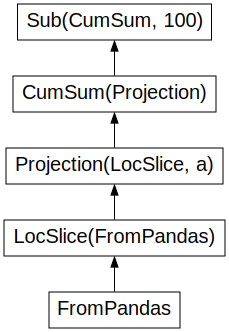

In [23]:
result.dask  # show internal graph info
result.visualize()  # visualize the computation graph

### Query Optimization (since Dask 2024.03.0)

Before computation, Dask runs a **query planner** to optimize performance.
This makes operations faster and reduces unnecessary work.

#### Common Optimizations

| Optimization                 | Description                                             |
| ---------------------------- | ------------------------------------------------------- |
| **Projection Pushdown**      | Selects only necessary columns early.                   |
| **Filter Pushdown**          | Moves filters closer to data loading.                   |
| **Partition Pruning**        | Avoids scanning irrelevant partitions.                  |
| **Avoiding Shuffles**        | Reuses existing data layout to skip redundant shuffles. |
| **Automatic Repartitioning** | Resizes partitions automatically for better efficiency. |

### Example

In [24]:
import dask.dataframe as dd
import pandas as pd

pdf = pd.DataFrame({"a": [1, 2, 3] * 5, "b": [1, 2, 3] * 5})
df = dd.from_pandas(pdf, npartitions=2)
df = df.replace(1, 5)[["a"]]

# View optimized query plan
df.optimize().pprint()

Replace: to_replace=1 value=5
  FromPandas: frame='<pandas>' npartitions=2 columns=['a'] pyarrow_strings_enabled=False


You can visualize the full query plan (requires `graphviz`):

In [25]:
df.explain()